# DAP Lab 5

### 1 Connecting to PostgreSQL from Python

In [1]:
import psycopg2

try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "192.168.56.30",
    port = "5432",
    database = "postgres")
    dbConnection.set_isolation_level(0)
    dbCursor = dbConnection.cursor()
    dbCursor.execute('CREATE DATABASE weather;')
    dbCursor.close()

except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection): dbConnection.close()

Error while connecting to PostgreSQL database "weather" already exists



### 3 Populating the table on PostgreSQL

In [2]:
createString = """
CREATE TABLE weather(
date_time timestamp PRIMARY KEY,
rain numeric(5,1),
temp numeric(5,1),
wetb numeric(5,1),
dewpt numeric(5,1),
vapps numeric(5,1),
rhum numeric(5,1),
msl numeric(7,1),
wdsp integer,
wddir integer,
ww integer,
w integer,
sun numeric(5,1),
vis integer,
clht integer,
clamt integer
);
"""
try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "192.168.56.30",
    port = "5432",
    database = "weather")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute(createString)
    dbCursor.close()

except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection): dbConnection.close()

Error while connecting to PostgreSQL relation "weather" already exists



In [6]:
import csv
try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "192.168.56.30",
        port = "5432",
        database = "weather")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    insertString = "INSERT INTO weather VALUES ('{}',"+"{},"*14+"{})"
    with open('Downloads/weather.csv', 'r') as f:
        reader = csv.reader(f)
        next(reader) # skip the header
        for row in reader:
            dbCursor.execute(insertString.format(*row))
    conn.commit()
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if(dbConnection): dbConnection.close()


Error: duplicate key value violates unique constraint "weather_pkey"
DETAIL:  Key (date_time)=(2010-01-01 00:00:00) already exists.



### 4 Querying the table

### 5 Display a bar chart of temperatures by month

    month       temp      wdsp
0     1.0   5.047258  2.000000
1     2.0   5.231678  2.000000
2     3.0   6.100524  2.002151
3     4.0   8.088000  1.999722
4     5.0  10.867245  2.000000
5     6.0  13.610611  2.000000
6     7.0  15.414274  2.000000
7     8.0  14.676667  2.000000
8     9.0  13.011500  2.001667
9    10.0  10.680484  2.000000
10   11.0   7.322407  2.000000
11   12.0   5.892727  2.000000


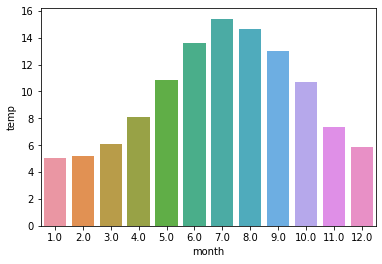

In [14]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

sql = """
SELECT
    EXTRACT(MONTH FROM date_time) AS month,
    AVG(temp) as temp,
    AVG(wdsp) AS wdsp
FROM
    weather
GROUP BY
    month;"""
try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "192.168.56.30",
        port = "5432",
        database = "weather")
    weather_dataframe = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if(dbConnection): dbConnection.close()

print(weather_dataframe)

sns.barplot(x="month", y="temp", data=weather_dataframe)

### 6 Querying and visualising the data

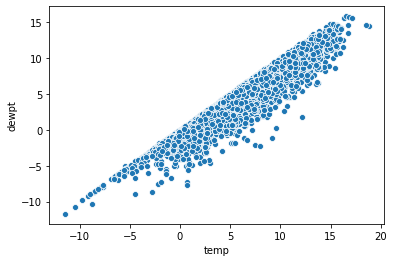

In [16]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
sql = """SELECT date(date_time) AS obs_date, MIN(temp) as temp,
MIN(dewpt) as dewpt FROM weather GROUP BY obs_date;"""
try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "192.168.56.30",
        port = "5432",
        database = "weather")
    weather_dataframe = sqlio.read_sql_query(sql, dbConnection)
    sns.scatterplot(x="temp", y="dewpt", data=weather_dataframe);
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [15]:
print(weather_dataframe)

    month       temp      wdsp
0     1.0   5.047258  2.000000
1     2.0   5.231678  2.000000
2     3.0   6.100524  2.002151
3     4.0   8.088000  1.999722
4     5.0  10.867245  2.000000
5     6.0  13.610611  2.000000
6     7.0  15.414274  2.000000
7     8.0  14.676667  2.000000
8     9.0  13.011500  2.001667
9    10.0  10.680484  2.000000
10   11.0   7.322407  2.000000
11   12.0   5.892727  2.000000
